Code for Machine Learning and Data Science II
=============================================



These are the code snippets used in `Training Models`
part of `Machine Learning and Data Science II`.



### Introduction



The following is a custom package written to handle plotting
and other functions required by the lecture. it is by no means
plt.show()
using plt.show().



In [1]:
import matplotlib.pyplot as plt
import ChalcedonPy as cp

# Initialise ChalcedonPy
cp.init(save_path="Training-Models",
        display_mode="slide")

### Linear Regression



A linear model makes a prediction by simply computing a
weighted sum of the input features, plus a constant called
the bias term (also called the intercept term),



#### The Normal Equation



To find the value of $\theta$ that minimizes the MSE, there
exists a closed-form solution—in other words, a
mathematical equation that gives the result directly.

This is called the Normal equation.

First generate some data.



In [2]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

The following code plots the data



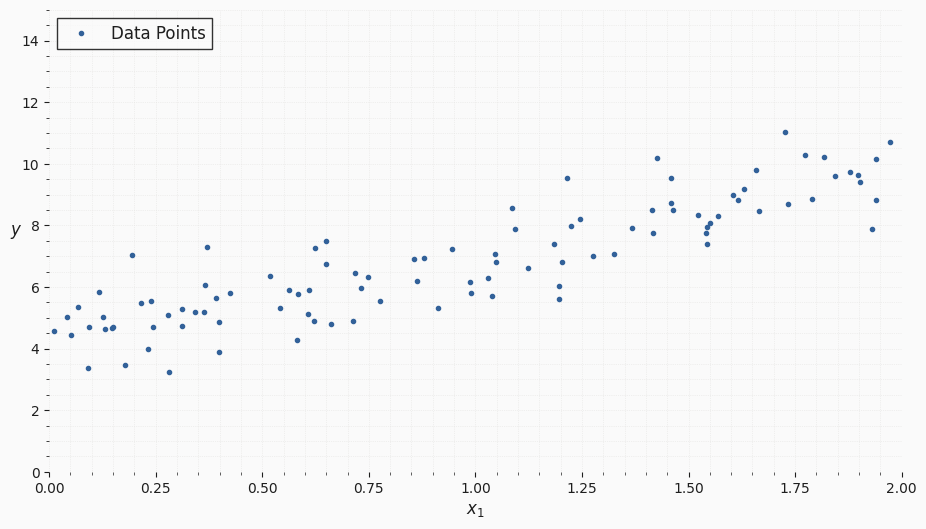

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
plt.plot(X, y, ".", label="Data Points")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])

plt.legend(loc="upper left")

plt.show()

Now time to calculate $\hat{\theta}$ using the normal equation:



In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


| FUNCTION|DEFINITION|MORE INFO|
| linalg.inv(&#x2026;))}}}|Given a square matrix a, return the matrix ainv satisfying {{{Code(a @ ainv = ainv @ a = eye(a.shape[0])|[a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html">Link</a](a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html">Link</a)|
| sklearn.preprocessing.add<sub>dummy</sub><sub>feature</sub>(&#x2026;)|Augment dataset with an additional dummy feature.|[a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html">Link</a](a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html">Link</a)|

Let’s see what the theta values are:



In [5]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


Not the best but not the worst either. Now we can make predictions using $\hat{\theta}$:



In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
print(y_predict)

[[4.21509616]
 [9.75532293]]


Let’s plot this model’s predictions:



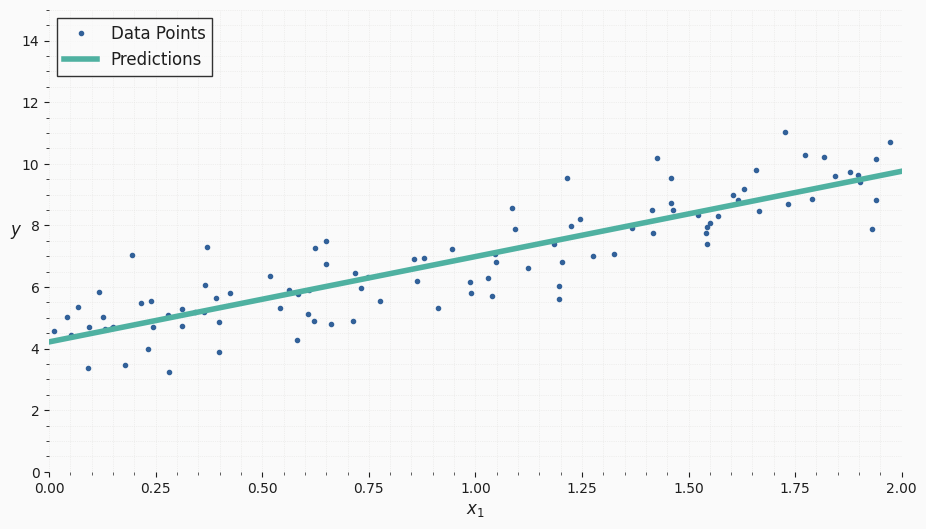

In [7]:
plt.figure(figsize=(11, 6))

plt.plot(X, y, ".", label="Data Points")
plt.plot(X_new, y_predict, "-", label="Predictions")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.axis([0, 2, 0, 15])

plt.legend(loc="upper left")

plt.show()

Performing linear regression using Scikit-Learn is relatively straightforward:



In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Estimated coefficients: ", lin_reg.coef_)
print("The b0 value is: ", lin_reg.intercept_)

Estimated coefficients:  [[2.77011339]]
The b0 value is:  [4.21509616]



| FUNCTION|DEFINITION|MORE INFO|
| sklearn.linear<sub>model.LinearRegression</sub>(&#x2026;)|Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.|[a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Link</a](a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Link</a)|
| .fit(&#x2026;)|Fit linear model.|[a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit">Link</a](a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit">Link</a)|

Same information can be retrieved from np.linalg.lstsq():



In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y,
                                                     rcond=1e-6)


| FUNCTION|DEFINITION|MORE INFO|
| np.linalg.lstsq(&#x2026;)|Return the least-squares solution to a linear matrix equation.|[a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html">Link</a](a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html">Link</a)|

You can use np.linalg.pinv() to compute the pseudoinverse directly:



In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])


| FUNCTION|DEFINITION|MORE INFO|
| np.linalg.pinv(&#x2026;)|Compute the (Moore-Penrose) pseudo-inverse of a matrix.|[a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html#numpy-linalg-pinv">Link</a](a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html#numpy-linalg-pinv">Link</a)|



### Gradient Descent



Gradient descent is a generic optimization algorithm
capable of finding optimal solutions to a wide range of problems.

The general idea of gradient descent is to tweak parameters
iteratively in order to minimize a cost function.

Let’s look at a quick implementation of Batch Gradient Descent algorithm:



In [11]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters
# Each iteration over the training set is called an epoch.
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print(theta)

[[4.21509616]
 [2.77011339]]


What about with different learning rate ? The code below
does just that.



In [12]:
import matplotlib as mpl
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, ".")
    n_epochs, n_shown = 1000, 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.title(fr"$\eta = {eta}$")
    return theta_path

And the plotting function for the comparison for
three different learning rates.



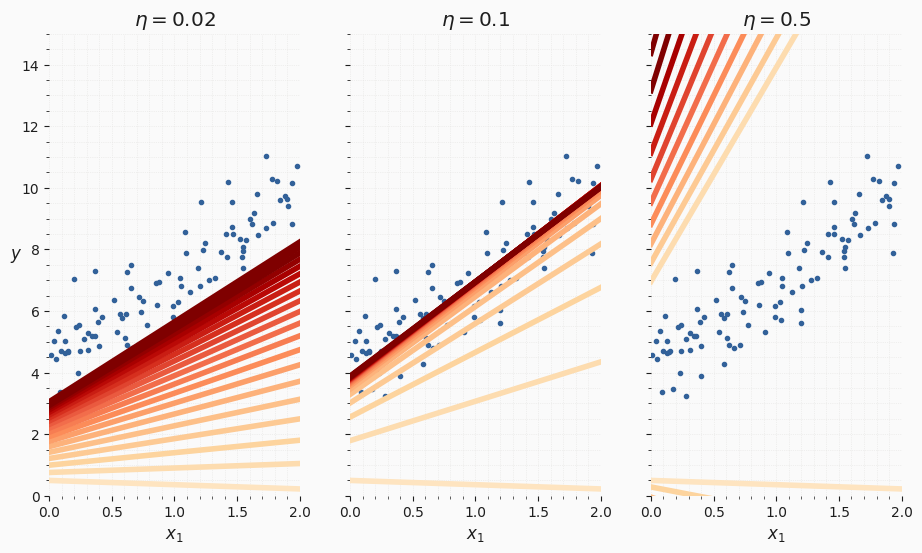

In [13]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
plt.figure(figsize=(11, 6))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

#### Stochastic Gradient Descent



stochastic gradient descent picks a random instance in the training
set at every step and computes the gradients based
only on that single instance.



In [14]:
theta_path_sgd = []

This code implements stochastic gradient descent using a simple learning schedule:



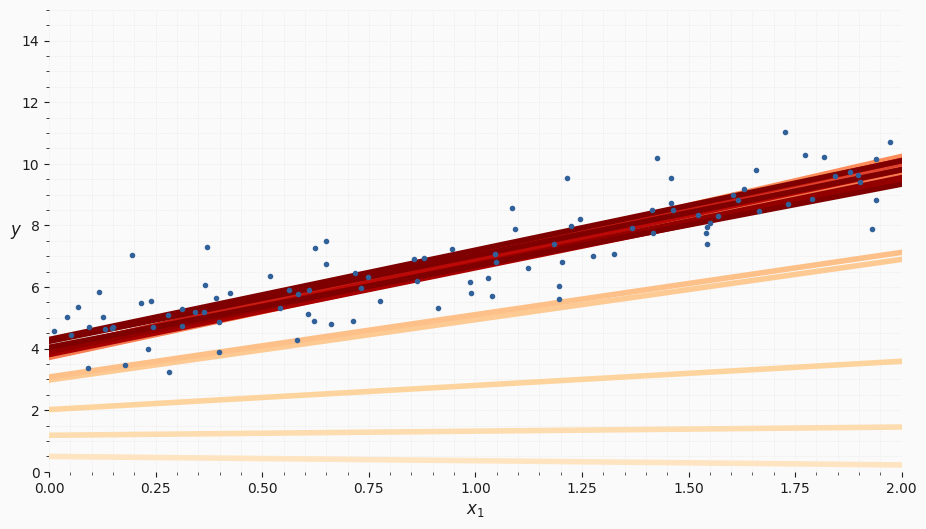

In [15]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
n_shown = 20

plt.figure(figsize=(11, 6))  

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

Let's see the solution to our algorithm.



In [16]:
print(theta)

[[4.21076011]
 [2.74856079]]


To perform linear regression using stochastic GD with Scikit-Learn,
you can use the SGDRegressor class, which defaults to optimizing
the MSE cost function.



In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)


| FUNCTION|DEFINITION|MORE INFO|
| sklearn.linear<sub>model.SGDRegressor</sub>(&#x2026;)|Linear model fitted by minimizing a regularized empirical loss with SGD.|[a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">Link</a](a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">Link</a)|

As can be seen our solution is quite close to the one returned by the normal solution.



In [18]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21278812] [2.77270267]


#### Mini-batch Gradient Descent



Each step, instead of computing the gradients based on the full
set (as in batch GD) or based on just one instance (as in stochastic GD),
mini-batch GD computes the gradients on small random sets of instances called mini-batches.

Time to compare all three.



In [19]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

In [20]:
theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

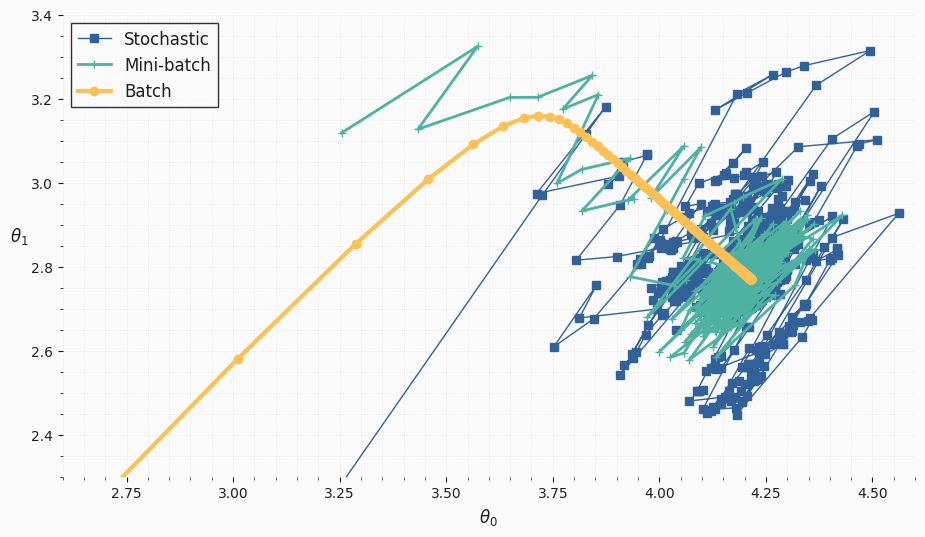

In [21]:
plt.figure(figsize=(11, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])

plt.show()

They all end up near the minimum, but batch GD’s path actually stops at the minimum,
while both stochastic GD and mini-batch GD continue to walk around.



### Polynomial Regression



What if your data is more complex than a straight line?

Surprisingly, you can use a linear model to fit nonlinear data.
A simple way to do this is to add powers of each feature as new features, then
train a linear model on this extended set of features. This technique is called polynomial regression.

First generate some random data.



In [22]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

And now we plot this data.



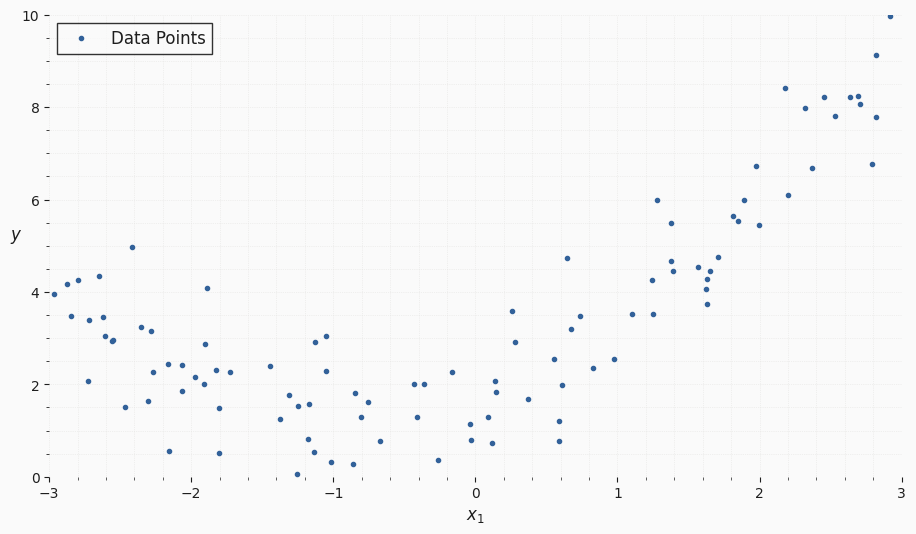

In [23]:
plt.figure(figsize=(11, 6))
 
plt.plot(X, y, ".", label="Data Points")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left")

plt.show()

A single line wont fit. We need to use sklearn.preprocessing.PolynomialFeatures()
for this:



In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]



| FUNCTION|DEFINITION|MORE INFO|
| sklearn.preprocessing.PolynomialFeatures(&#x2026;)|Generate polynomial and interaction features.|[a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">Link</a](a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">Link</a)|

We can now see our results.



In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

[1.78134581] [[0.93366893 0.56456263]]


And plot our comparisons.



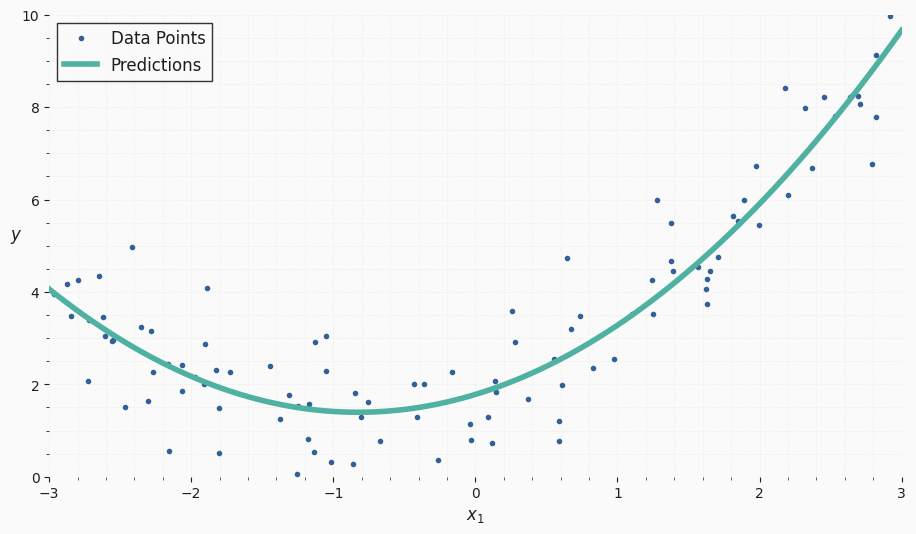

In [26]:
plt.figure(figsize=(11, 6))

plt.plot(X, y, ".", label="Data Points")
plt.plot(X_new, y_new, "-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])

plt.show()

#### Learning Curves



Let's see if increasing the degree number improves
our model.



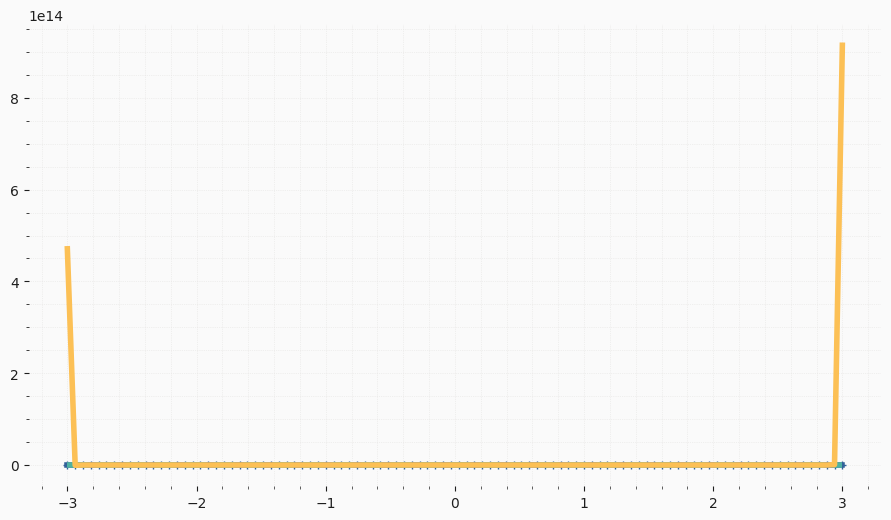

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(11, 6))
for style, width, degree in (("-+", 2, 1), ("--", 2, 2), ("-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label)

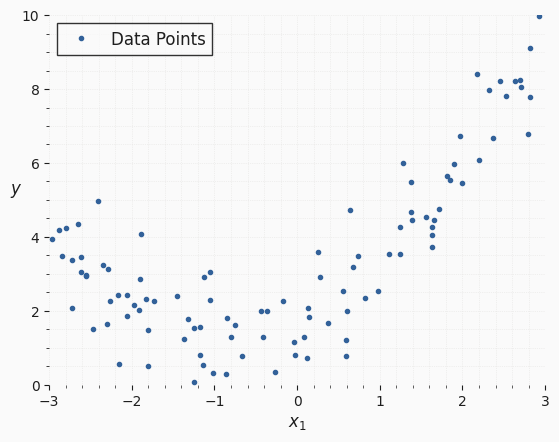

In [28]:
plt.plot(X, y, ".", label="Data Points")
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.show()
plt.close()

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

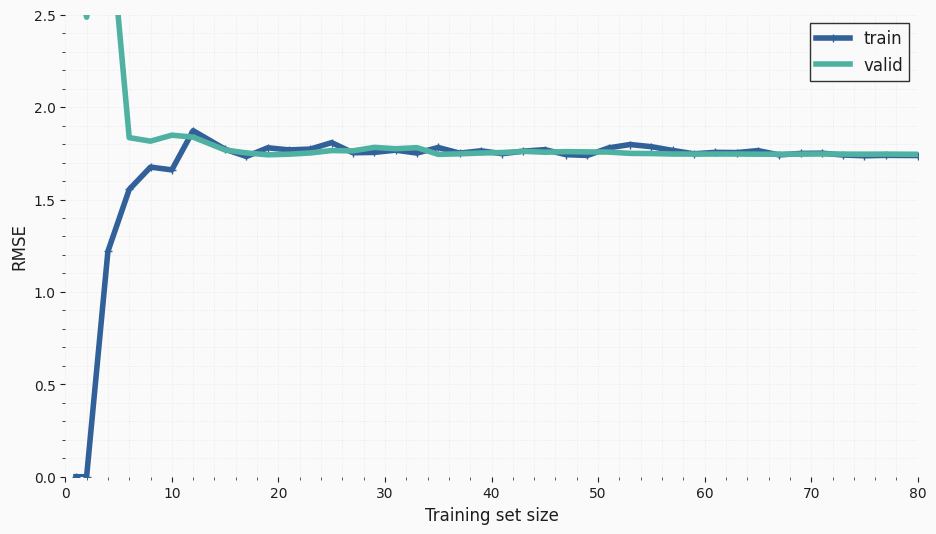

In [30]:
plt.figure(figsize=(11, 6))

plt.plot(train_sizes, train_errors, "-+", label="train")
plt.plot(train_sizes, valid_errors, "-", label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")

plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

In [31]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

In [32]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

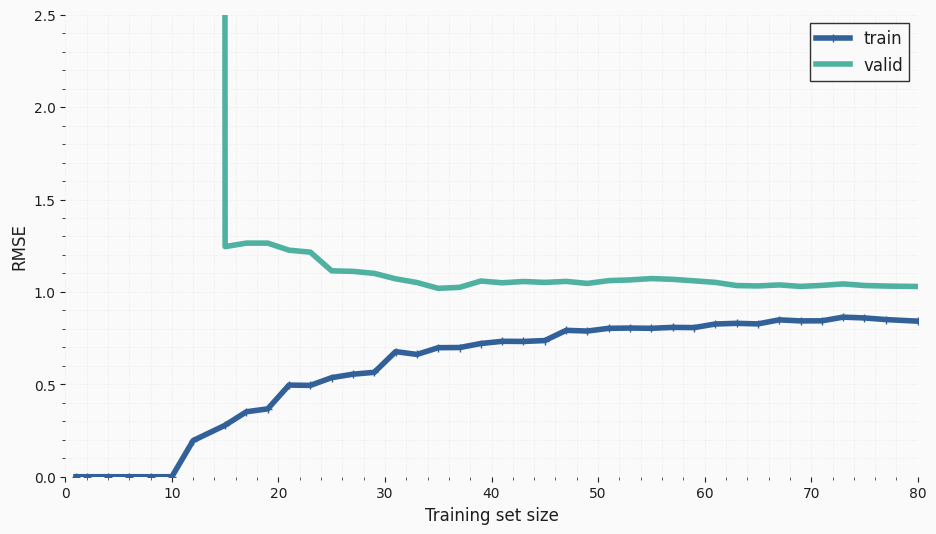

In [33]:
plt.figure(figsize=(11, 6))

plt.plot(train_sizes, train_errors, "-+", label="train")
plt.plot(train_sizes, valid_errors, "-", label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 2.5])

plt.show()

### Regularised Linear Models



#### Ridge Regression



In [34]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

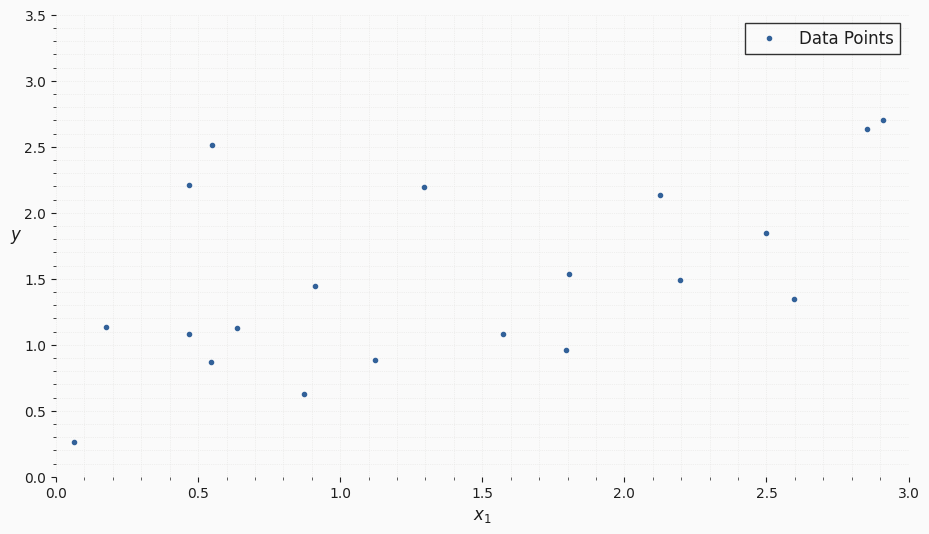

In [35]:
plt.figure(figsize=(11, 6))

plt.plot(X, y, ".", label = "Data Points")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.legend(loc="upper right")
plt.axis([0, 3, 0, 3.5])

plt.show()

In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

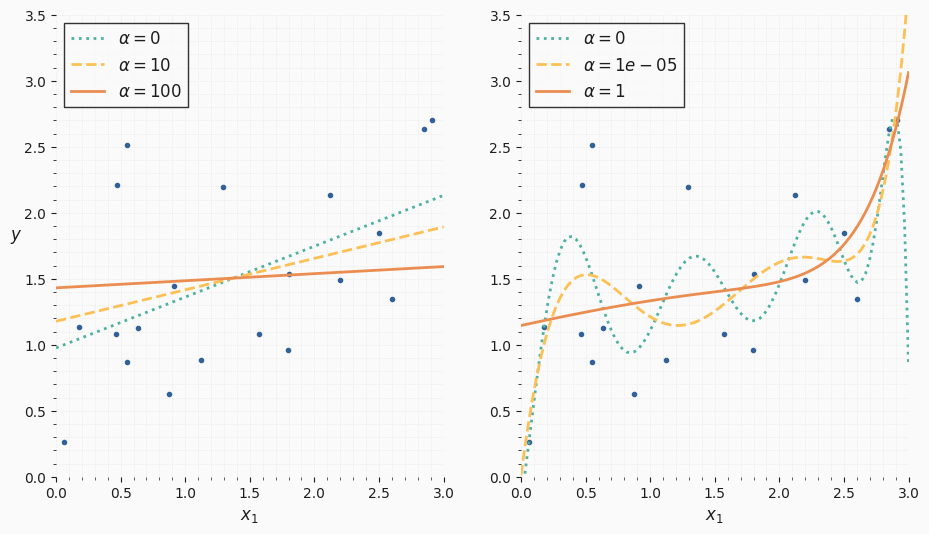

In [37]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, ".")
    for alpha, style in zip(alphas, (":", "--", "-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])

plt.figure(figsize=(11, 6))
    
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [38]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
print(sgd_reg.predict([[1.5]]))

[1.55302613]


In [39]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[1.55326019]]


In [40]:
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
print(np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y)

print(ridge_reg.intercept_, ridge_reg.coef_  )

[[0.97898394]
 [0.3828496 ]]
[0.97896386] [[0.38286422]]


#### Lasso Regression



In [41]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

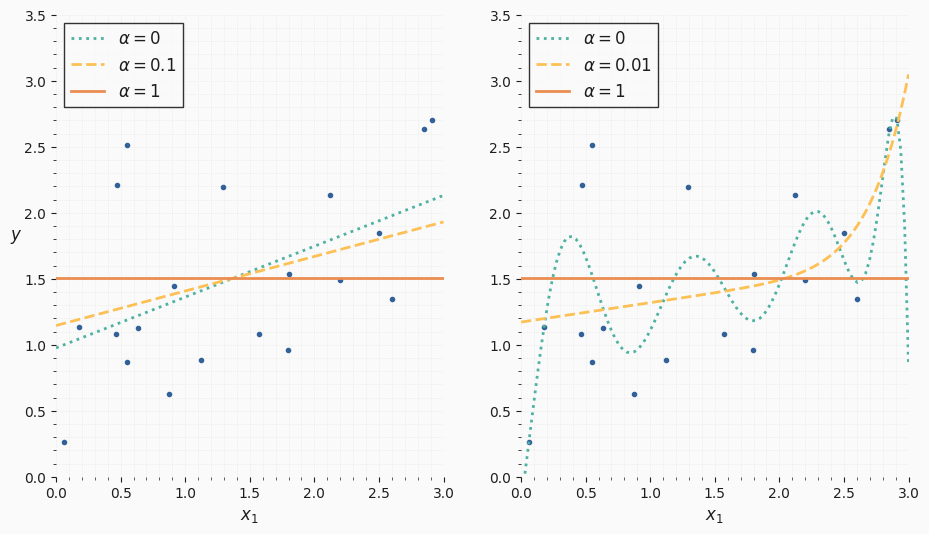

In [42]:
plt.figure(figsize=(11, 6))

plt.subplot(121)

plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)

plt.show()

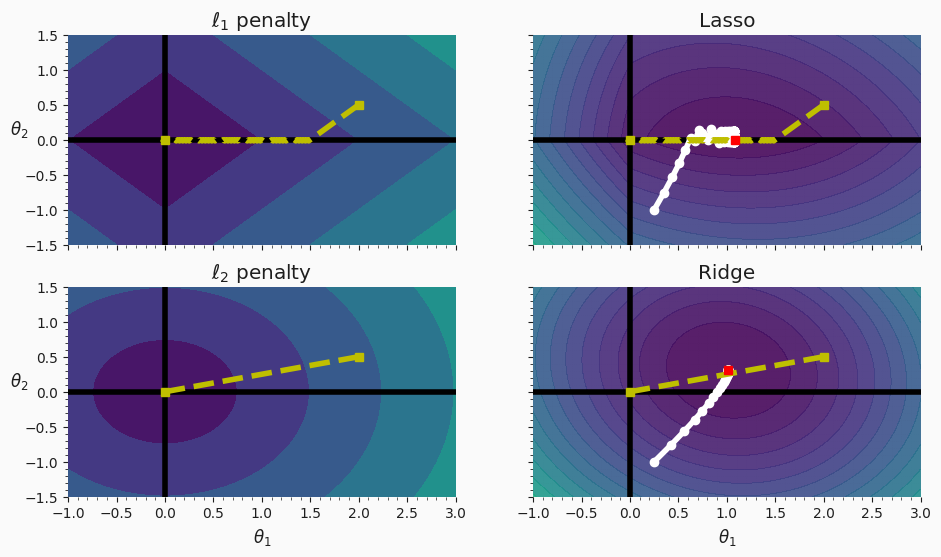

In [43]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11, 6))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

#### Elastic Net



In [44]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))

[1.54333232]


#### Early Stopping



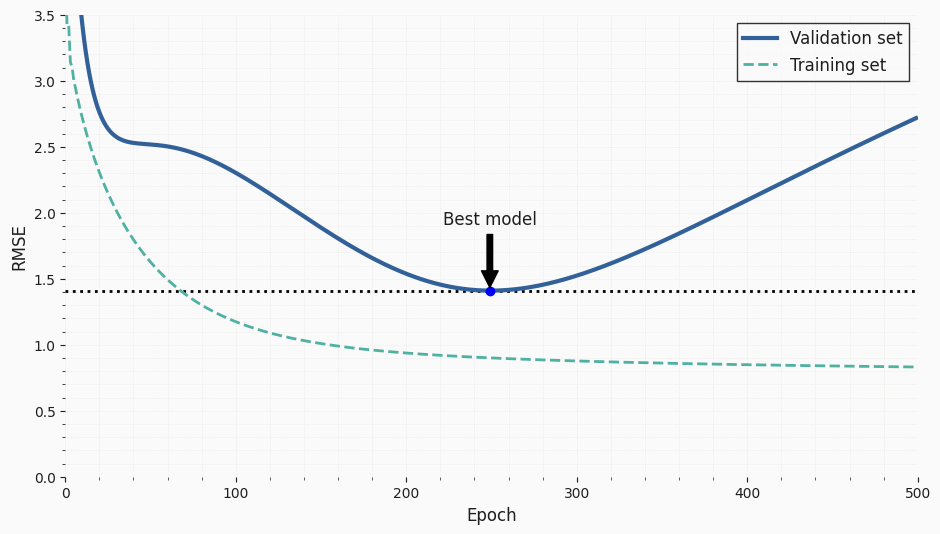

In [65]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], [] 

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(11, 6))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.show()

### Logistic Regression



#### Estimating Probabilities



In [46]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

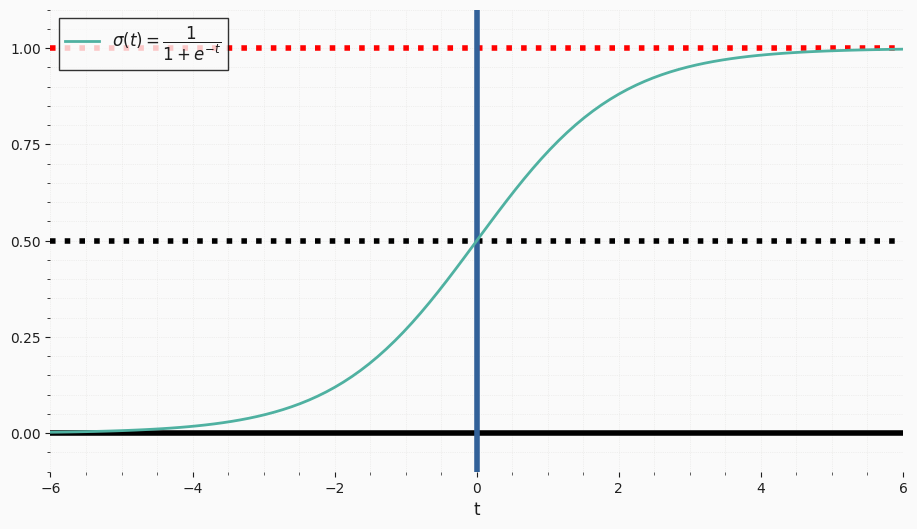

In [47]:
plt.figure(figsize=(11, 6))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "r:")
plt.plot([0, 0], [-1.1, 1.1], "-")
plt.plot(t, sig, "-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.show()

#### Desicion Boundaries



In [48]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(list(iris))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [49]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [50]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

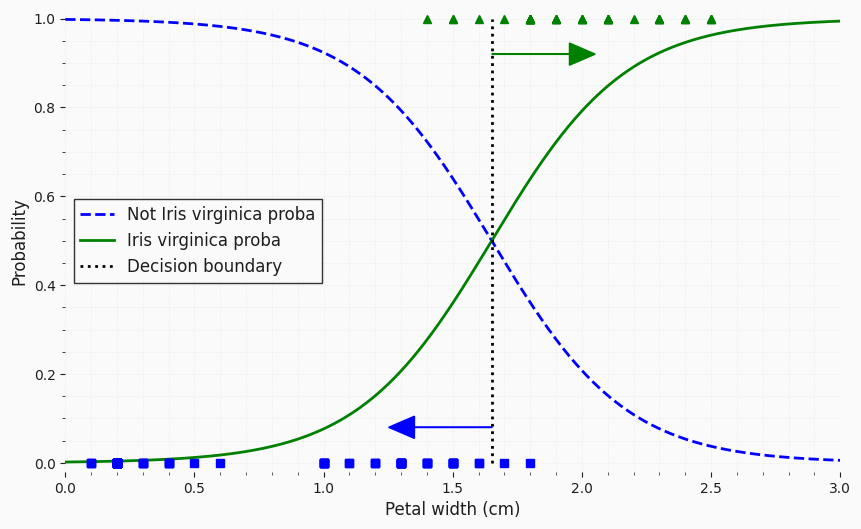

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)"), plt.ylabel("Probability")
plt.legend(loc="center left"), plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [56]:
decision_boundary

1.6516516516516517

In [57]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [58]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

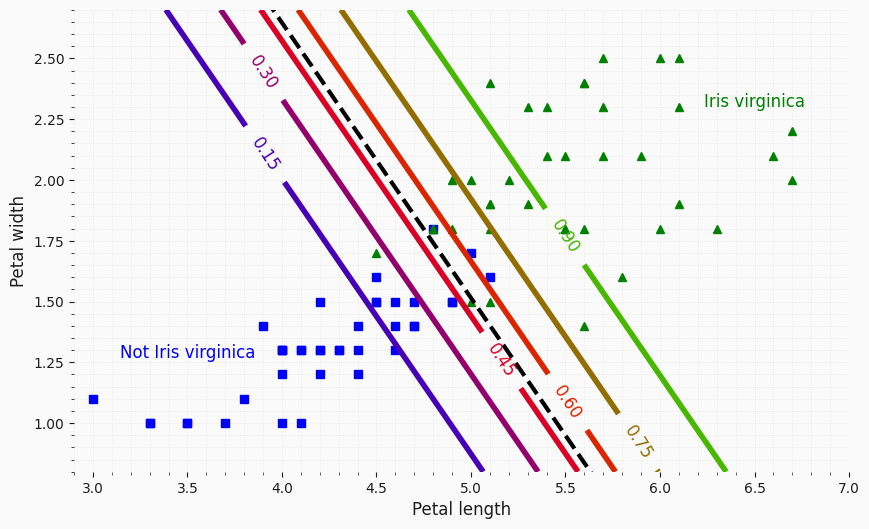

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

#### Softmax Regression



Softmax regression (or multinomial logistic regression) is a generalization
of logistic regression to the case where we want to handle multiple classes.



In [60]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [61]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

In [62]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

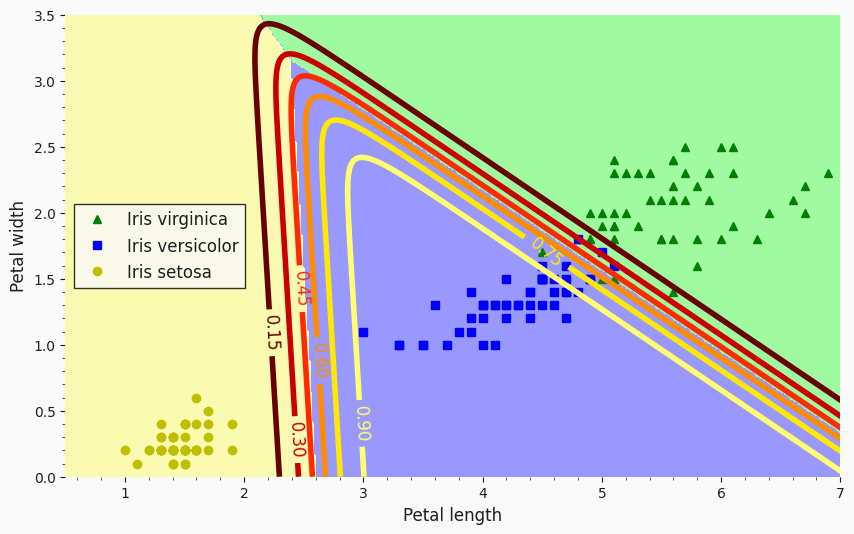

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])

plt.show()